### Predictive Modeling for Hospital Readmission

In [1]:
# import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from numpy import percentile
import scipy as sy

In [3]:
#pip install kmodes

In [5]:
# Load the dataset
data=pd.read_csv('diabetes.csv')

In [6]:
# Size of the dataset
print('Number of Records=',data.shape[0])
print('Number of Attributes=',data.shape[1])

Number of Records= 768
Number of Attributes= 9


In [7]:
# Identifying Predictor and Target Attributes
print('Predictor Attributes=',data.columns[:-1])
print('Target Attribute=',data.columns[-1])

Predictor Attributes= Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Target Attribute= Outcome


In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
# Finding the new dimension of the dataset
data.shape

(768, 9)

In [12]:
pd.set_option('display.precision', 2)

In [13]:
# Numerical Features and checking of null values
Num_Cols=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
print('No. of Numeric Features=',len(Num_Cols))
for i in range(len(Num_Cols)):
    if data[Num_Cols[i]].isnull().sum()>0:
        print(Num_Cols[i],data[Num_Cols[i]].isnull().sum())

No. of Numeric Features= 8


In [14]:
def univariate_num(a):
    mean = np.mean(a)
    median = np.median(a)
    variance = np.var(a)
    Std_Dev =np.std(a)
    quartiles=percentile(a,[25,75])
    minimum=min(a)
    Q1 = quartiles[0]
    Q3 = quartiles[1]
    maximum = max(a)
    iqr=quartiles[1]-quartiles[0]
    skew = sy.stats.skew(a)
    return mean,median,variance,Std_Dev,minimum,Q1,Q3,iqr,maximum,skew

In [15]:
Num_Analysis=[]
num_ana_names=['Mean','Median','Variance','SD','Min','Q1','Q3','IQR','Max','Skew']
for i in range(len(Num_Cols)):
    Num_Analysis.append(univariate_num(data[Num_Cols[i]]))
df_Num_Analysis=pd.DataFrame(Num_Analysis,columns=num_ana_names)
df_Num_Analysis.rename(index={0:'time_in_hospital',1:'num_lab_procedures',2:'num_procedures',3:'num_medications',4:'number_outpatient',5:'number_emergency',6:'number_inpatient',7:'number_diagnoses'},inplace=True)
print(df_Num_Analysis)

                     Mean  Median  Variance     SD  Min    Q1    Q3   IQR  \
time_in_hospital     4.38     4.0      8.81   2.97    1   2.0   6.0   4.0   
num_lab_procedures  42.91    44.0    384.57  19.61    1  31.0  57.0  26.0   
num_procedures       1.33     1.0      2.90   1.70    0   0.0   2.0   2.0   
num_medications     15.98    15.0     65.53   8.10    1  10.0  20.0  10.0   
number_outpatient    0.37     0.0      1.60   1.27    0   0.0   0.0   0.0   
number_emergency     0.20     0.0      0.88   0.94    0   0.0   0.0   0.0   
number_inpatient     0.63     0.0      1.59   1.26    0   0.0   1.0   1.0   
number_diagnoses     7.40     8.0      3.77   1.94    1   6.0   9.0   3.0   

                    Max   Skew  
time_in_hospital     14   1.14  
num_lab_procedures  132  -0.24  
num_procedures        6   1.32  
num_medications      81   1.34  
number_outpatient    42   8.84  
number_emergency     76  22.85  
number_inpatient     21   3.63  
number_diagnoses     16  -0.86  


Boxplot


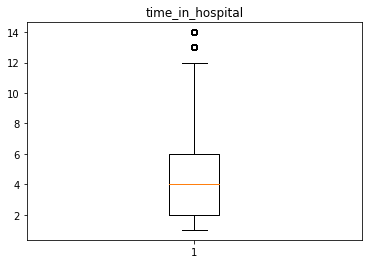

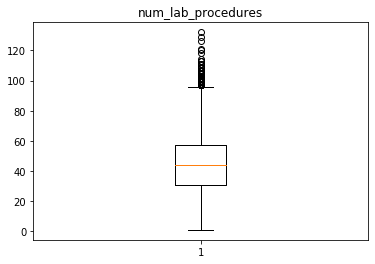

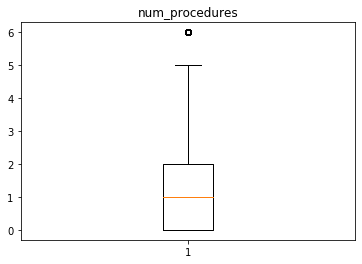

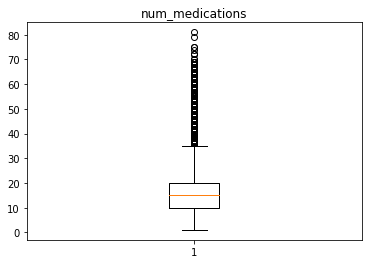

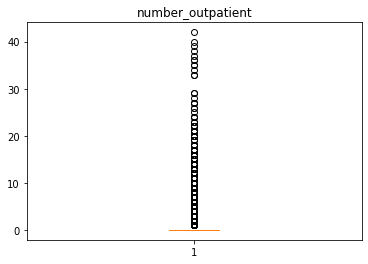

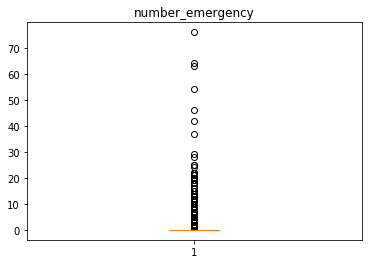

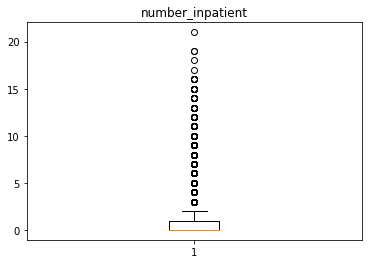

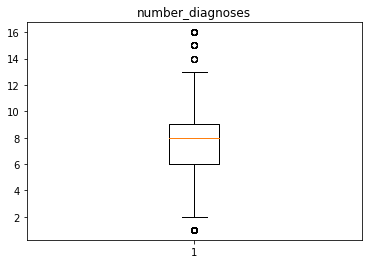

In [16]:
print('Boxplot')
for i in range(len(Num_Cols)):
    plt.title(Num_Cols[i])
    plt.boxplot(data[Num_Cols[i]])
    plt.show()

                    time_in_hospital  num_lab_procedures  num_procedures  \
time_in_hospital            1.00e+00            3.20e-01            0.19   
num_lab_procedures          3.20e-01            1.00e+00            0.05   
num_procedures              1.90e-01            5.17e-02            1.00   
num_medications             4.64e-01            2.65e-01            0.38   
number_outpatient          -9.22e-03           -7.60e-03           -0.03   
number_emergency           -9.58e-03           -9.76e-04           -0.04   
number_inpatient            7.42e-02            3.99e-02           -0.07   
number_diagnoses            2.21e-01            1.50e-01            0.07   

                    num_medications  number_outpatient  number_emergency  \
time_in_hospital               0.46          -9.22e-03         -9.58e-03   
num_lab_procedures             0.27          -7.60e-03         -9.76e-04   
num_procedures                 0.38          -2.53e-02         -3.87e-02   
num_medicat

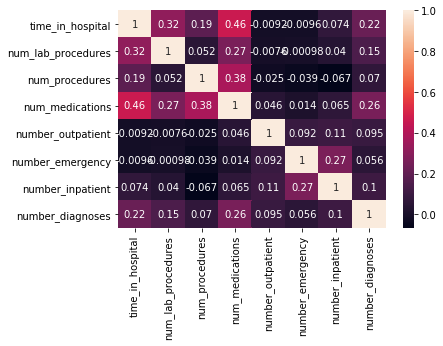

In [17]:
Num_Corr=data[Num_Cols].corr()
print(Num_Corr)
sb.heatmap(Num_Corr,annot=True)
plt.show()

In [18]:
# Categorical Features
Cat_Cols=['race', 'gender', 'age','weight','max_glu_serum', 'A1Cresult', 'examide','citoglipton', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'medical_specialty','payer_code','diag_1','diag_2','diag_3']
print('No. of Categorical Features=',len(Cat_Cols))

No. of Categorical Features= 36


In [19]:
for i in range(len(Cat_Cols)):
    print(pd.crosstab(index=data[Cat_Cols[i]],columns='Count'),'\n')

col_0            Count
race                  
?                 2234
AfricanAmerican  18770
Asian              627
Caucasian        74215
Hispanic          2015
Other             1472 

col_0            Count
gender                
Female           53451
Male             45879
Unknown/Invalid      3 

col_0     Count
age            
[0-10)      159
[10-20)     690
[20-30)    1649
[30-40)    3764
[40-50)    9606
[50-60)   17059
[60-70)   22056
[70-80)   25329
[80-90)   16432
[90-100)   2589 

col_0      Count
weight          
>200           3
?          96210
[0-25)        48
[100-125)    617
[125-150)    143
[150-175)     34
[175-200)     11
[25-50)       90
[50-75)      866
[75-100)    1311 

col_0          Count
max_glu_serum       
>200            1419
>300            1188
None           94181
Norm            2545 

col_0      Count
A1Cresult       
>7          3773
>8          8137
None       82501
Norm        4922 

col_0    Count
examide       
No       99333 

col_0        Count

In [20]:
data=data.loc[~data.gender.isin(['Unknown/Invalid'])]
data.shape

(99330, 49)

In [21]:
# Attributes examide and citoglipton have single value and hence no effect on target attribute
# Attribute Weight has 96% missing value and hence can be removed
# Attribute payer_code will not have any effect on the Target and hence can be removed
# Attributes diag_2 and diag_3 are detailed code for the diagnosis and hence can be removed from analysis
data=data.drop(['examide','citoglipton','weight','payer_code','diag_2','diag_3'], axis=1)
Cat_Cols=[ele for ele in Cat_Cols if ele not in ['examide','citoglipton','weight','payer_code','diag_2','diag_3']]
print('No. of Categorical Features',len(Cat_Cols))

No. of Categorical Features 30


In [22]:
# Replace ? with NaN value
data=data.replace('?',np.nan)

In [23]:
# Categorical Features and checking of null values
for i in range(len(Cat_Cols)):
    if data[Cat_Cols[i]].isnull().sum()>0:
        print(Cat_Cols[i],data[Cat_Cols[i]].isnull().sum(), 'percentage',int(data[Cat_Cols[i]].isnull().sum()*100/data.shape[0]))        

race 2232 percentage 2
medical_specialty 48606 percentage 48
diag_1 20 percentage 0


In [24]:
pd.crosstab(data['race'],data['readmitted'])

readmitted,<30,>30,NO
race,,,
AfricanAmerican,2149,6618,10003
Asian,65,161,401
Caucasian,8555,27096,38564
Hispanic,212,641,1162
Other,144,446,881


In [25]:
race_temp=pd.concat([data['age'],data['gender'],data['race']], axis=1)
race_temp_yes=race_temp.loc[data['race'].notnull(),['age','gender','race']]
race_temp_no=race_temp.loc[data['race'].isnull(),['age','gender']]

In [26]:
race_temp_no_idx=data.index[(data['race'].isnull())]
print(race_temp_no_idx)

Int64Index([    19,     20,     21,     54,     65,     87,     99,    111,
               127,    177,
            ...
            101511, 101525, 101533, 101537, 101584, 101659, 101671, 101702,
            101715, 101732],
           dtype='int64', length=2232)


In [30]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

In [31]:
clusters = km.fit_predict(race_temp_yes)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1251, cost: 66451.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 68279.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2759, cost: 62073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 19750, cost: 68520.0
Run 4, iteration: 2/100, moves: 683, cost: 68520.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 77282.0
Best run was number 3


In [32]:
print(km.cluster_centroids_)

[['[80-90)' 'Female' 'Caucasian']
 ['[60-70)' 'Male' 'Caucasian']
 ['[70-80)' 'Female' 'Caucasian']
 ['[70-80)' 'Male' 'Caucasian']
 ['[50-60)' 'Female' 'AfricanAmerican']]


In [33]:
km_test=[]
race_repl=[]
for i in range(len(race_temp_no)):
    temp=np.array([[race_temp_no.iloc[i,0]],[race_temp_no.iloc[i,1]]])
    km_test.append(km.predict(temp))
    race_repl.append(km_test[i][0:1].item())

In [34]:
for i in range(len(race_temp_no)):
    data.loc[race_temp_no_idx[i],'race']=race_repl[i]

In [35]:
data['race']=data['race'].replace(0,'Caucasian')
data['race']=data['race'].replace(1,'Caucasian')
data['race']=data['race'].replace(2,'Caucasian')
data['race']=data['race'].replace(3,'Caucasian')
data['race']=data['race'].replace(4,'AfricanAmerican')

In [36]:
data['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [37]:
diag1_no_idx=data.index[data['diag_1'].isnull()]
diag1_no_rec=data.loc[diag1_no_idx,['diabetesMed','medical_specialty','max_glu_serum','A1Cresult']]

In [38]:
print(diag1_no_rec.groupby('diabetesMed').size())

diabetesMed
No      5
Yes    15
dtype: int64


In [39]:
for i in range(len(diag1_no_idx)):
    if diag1_no_rec.loc[diag1_no_idx[i], 'diabetesMed']=='Yes':
        data.loc[diag1_no_idx[i],'diag_1']=250

In [40]:
data[data.diag_1.isnull()]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Target
518,Caucasian,Male,[60-70),6,25,1,4,Surgery-Neuro,48,1,...,No,No,No,No,No,No,No,No,NO,0
1006,Caucasian,Male,[80-90),3,3,5,3,Urology,34,1,...,No,No,No,No,No,No,No,No,>30,0
7845,AfricanAmerican,Male,[50-60),3,5,1,1,Urology,20,1,...,No,No,No,No,No,No,No,No,NO,0
32514,Caucasian,Male,[50-60),1,1,17,4,Hematology/Oncology,18,1,...,No,No,No,No,No,No,No,No,NO,0
66848,AfricanAmerican,Male,[70-80),1,6,7,3,NaN,53,0,...,No,No,No,No,No,No,No,No,NO,0


In [41]:
data.loc[(data.medical_specialty=='Urology'),'diag_1']=599
data.loc[(data.medical_specialty=='Surgery-Neuro'),'diag_1']=349
data.loc[(data.medical_specialty=='Hematology/Oncology'),'diag_1']=289

In [42]:
data=data.loc[~data.diag_1.isnull()]

In [43]:
data['New_Age']=data['age'].map(lambda x: x.lstrip('[').rstrip(')'))
dummy_df_age = pd.DataFrame({'age': data['New_Age']})
dummy_df_age['start'], dummy_df_age['end'] = zip(*data['New_Age'].map(lambda x: x.split('-')))
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean
dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))
data['New_Age']=dummy_df_age['age_mean']

In [44]:
Cat_Cols.append('New_Age')
Cat_Cols.remove('age')

In [45]:
data['New_Age'].unique()

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.])

In [46]:
data['last_yr_visit']=data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']
print(data.last_yr_visit.nunique())

47


In [47]:
data['last_yr_visit']=np.where(data['last_yr_visit'].between(1,10),1,data['last_yr_visit'])
data['last_yr_visit']=np.where(data['last_yr_visit'].between(11,20),2,data['last_yr_visit'])
data['last_yr_visit']=np.where(data['last_yr_visit'].between(21,30),3,data['last_yr_visit'])
data['last_yr_visit']=np.where(data['last_yr_visit'].between(31,80),4,data['last_yr_visit'])

In [48]:
data.groupby('last_yr_visit').size()

last_yr_visit
0    54665
1    43691
2      870
3       72
4       31
dtype: int64

In [49]:
print(pd.crosstab(data['last_yr_visit'],data['Target']))
print(pd.crosstab(data['last_yr_visit'],data['Target'],normalize='index'))

Target             0     1
last_yr_visit             
0              50115  4550
1              37234  6457
2                588   282
3                 54    18
4                 25     6
Target            0     1
last_yr_visit            
0              0.92  0.08
1              0.85  0.15
2              0.68  0.32
3              0.75  0.25
4              0.81  0.19


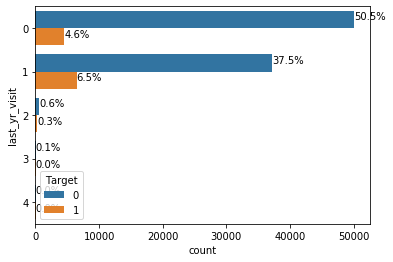

In [50]:
ax=sb.countplot(y=data['last_yr_visit'],hue=data['Target'])
total=len(data['last_yr_visit'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Text(0.5, 1.0, 'Last Year Visit VS. Readmission')

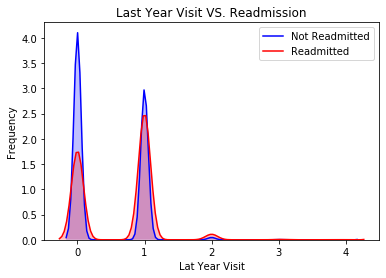

In [51]:
ax=sb.kdeplot(data.loc[(data['Target'] == 0),'last_yr_visit'] , color='b',shade=True,label='Not Readmitted')
ax=sb.kdeplot(data.loc[(data['Target'] == 1),'last_yr_visit'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Lat Year Visit', ylabel='Frequency')
plt.title('Last Year Visit VS. Readmission')

In [52]:
tr_med_cols=[]
medication=['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin','glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
for i in medication:
    name='tr_'+i
    #Cat_Cols.append(name)
    tr_med_cols.append(name)
    data[name]=data[i].apply(lambda x:0 if (x=='No' or x=='Steady') else 1)   

In [53]:
Cat_Cols=[ele for ele in Cat_Cols if ele not in medication]

In [54]:
Cat_Cols

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'change',
 'diabetesMed',
 'medical_specialty',
 'diag_1',
 'New_Age']

In [55]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,tr_acarbose,tr_miglitol,tr_troglitazone,tr_tolazamide,tr_insulin,tr_glyburide-metformin,tr_glipizide-metformin,tr_glimepiride-pioglitazone,tr_metformin-rosiglitazone,tr_metformin-pioglitazone
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,...,0,0,0,0,1,0,0,0,0,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,...,0,0,0,0,0,0,0,0,0,0
3,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,...,0,0,0,0,1,0,0,0,0,0
4,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data_idx=data.index

In [57]:
data_idx

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            101756, 101757, 101758, 101759, 101760, 101761, 101762, 101763,
            101764, 101765],
           dtype='int64', length=99329)

In [58]:
data['med_status']=0
for i in tr_med_cols:
    data['med_status']=data['med_status']+data[i]

In [59]:
print(pd.crosstab(data['med_status'],data['Target']))
#print(pd.crosstab(data['med_status'],data['Target'],normalize='index'))

Target          0     1
med_status             
0           64606  7704
1           22174  3434
2            1140   159
3              91    16
4               5     0


In [60]:
print(data['med_status'].value_counts())
print(print(pd.crosstab(data['med_status'],data['Target'],normalize='index')))

0    72310
1    25608
2     1299
3      107
4        5
Name: med_status, dtype: int64
Target         0     1
med_status            
0           0.89  0.11
1           0.87  0.13
2           0.88  0.12
3           0.85  0.15
4           1.00  0.00
None


In [61]:
data.loc[0:5,['med_status','Target','change','diabetesMed','diag_1','medical_specialty']]

,med_status,Target,change,diabetesMed,diag_1,medical_specialty
0,0,0,No,No,250.83,Pediatrics-Endocrinology
1,1,0,Ch,Yes,276,NaN
2,0,0,No,Yes,648,NaN
3,1,0,Ch,Yes,8,NaN
4,0,0,Ch,Yes,197,NaN
5,0,0,No,Yes,414,NaN


In [62]:
t=data.index[(data['med_status']==0) & (data['Target']==1)]
t1=data.loc[t,['A1Cresult','max_glu_serum','change','diabetesMed','diag_1','medical_specialty','Target']]

In [63]:
len(t1)

7704

In [64]:
t1.groupby('max_glu_serum').size()

max_glu_serum
>200     121
>300      92
None    7267
Norm     224
dtype: int64

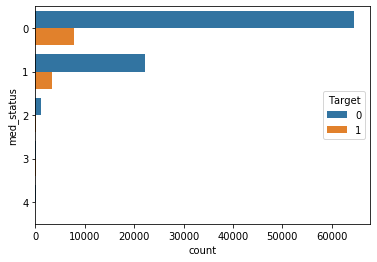

In [65]:
sb.countplot(y=data['med_status'],hue=data['Target'])

In [66]:
data['change']=data['change'].apply(lambda x:1 if (x=='Ch') else 0)    
data['diabetesMed']=data['diabetesMed'].apply(lambda x:1 if (x=='Yes')else 0)
data['gender']=data['gender'].apply(lambda x:1 if (x=='Male') else 0)

In [67]:
data.loc[data['diag_1'].str.contains('V',na=False),['diag_1']]=0
data.loc[data['diag_1'].str.contains('E',na=False),['diag_1']]=0

In [68]:
data['diag_1']=data['diag_1'].astype(float)

In [69]:
for idx, rec in data.iterrows():
    if (rec['diag_1'] >= 390 and rec['diag_1'] < 460) or (np.floor(rec['diag_1']) == 785):
        data.loc[idx, 'diag_1'] = 1
    elif (rec['diag_1'] >= 460 and rec['diag_1'] < 520) or (np.floor(rec['diag_1']) == 786):
        data.loc[idx, 'diag_1'] = 2
    elif (rec['diag_1'] >= 520 and rec['diag_1'] < 580) or (np.floor(rec['diag_1']) == 787):
        data.loc[idx, 'diag_1'] = 3
    elif (rec['diag_1'] >= 580 and rec['diag_1'] < 630) or (np.floor(rec['diag_1']) == 788):
        data.loc[idx, 'diag_1'] = 4
    elif (np.floor(rec['diag_1']) == 250):
        data.loc[idx, 'diag_1'] = 5
    else:
        data.loc[idx, 'diag_1'] = 0

In [70]:
pd.crosstab(data['A1Cresult'],data['Target'])

Target,0,1
A1Cresult,,
>7,3390,383
>8,7328,809
None,72857,9640
Norm,4441,481


In [71]:
print(len(data[data['A1Cresult']=='None'].index)/len(data)*100)
print(len(data[data['A1Cresult']=='None'].index))
print(len((data[data['A1Cresult']=='None'].index) & (data[data['Target']==1].index)))
print(len((data[data['A1Cresult']=='None'].index) & (data[data['Target']==1].index))/len(data[data['A1Cresult']=='None'].index)*100)

83.05429431485265
82497
9640
11.685273403881354


In [72]:
pd.crosstab(data['max_glu_serum'],data['Target'])

Target,0,1
max_glu_serum,,
>200,1235,184
>300,1009,179
None,83521,10656
Norm,2251,294


In [73]:
print(len(data[data['max_glu_serum']=='None'].index)/len(data)*100)
print(len(data[data['max_glu_serum']=='None'].index))
print(len((data[data['max_glu_serum']=='None'].index) & (data[data['Target']==1].index)))
print(len((data[data['max_glu_serum']=='None'].index) & (data[data['Target']==1].index))/len(data[data['max_glu_serum']=='None'].index)*100)

94.81319654884274
94177
10656
11.314864563534622


In [74]:
NTest_A1C_Glu_Adm_idx=data.index[(data['max_glu_serum']=='None') & (data['A1Cresult']=='None') & (data['Target']==1)]

In [75]:
NTest_A1C_Glu_Adm_Rec=data.loc[NTest_A1C_Glu_Adm_idx,['change','diabetesMed','diag_1','med_status']]

In [76]:
NTest_A1C_Glu_Adm_Rec.groupby('change').size()

change
0    4712
1    4307
dtype: int64

In [77]:
NTest_A1C_Glu_Adm_Rec.groupby('diabetesMed').size()

diabetesMed
0    1855
1    7164
dtype: int64

In [78]:
print('Not Tested and readmitted, change prescribed in diabetes medication = %.2f %%'%(len(NTest_A1C_Glu_Adm_Rec[(NTest_A1C_Glu_Adm_Rec['change']==1)])/len(NTest_A1C_Glu_Adm_Rec)*100))
print('Not Tested and readmitted, diabetes medication prescribed = %.2f %%'%(len(NTest_A1C_Glu_Adm_Rec[(NTest_A1C_Glu_Adm_Rec['diabetesMed']==1)])/len(NTest_A1C_Glu_Adm_Rec)*100))

Not Tested and readmitted, change prescribed in diabetes medication = 47.75 %
Not Tested and readmitted, diabetes medication prescribed = 79.43 %


In [79]:
NTest_A1C_Glu_NAdm_idx=data.index[(data['max_glu_serum']=='None') & (data['A1Cresult']=='None') & (data['Target']==0)]

In [80]:
NTest_A1C_Glu_NAdm_Rec=data.loc[NTest_A1C_Glu_NAdm_idx,['change','diabetesMed','med_status','diag_1','Target']]

In [81]:
NTest_A1C_Glu_NAdm_Rec.groupby('change').size()

change
0    38411
1    30209
dtype: int64

In [82]:
NTest_A1C_Glu_NAdm_Rec.groupby('diabetesMed').size()

diabetesMed
0    16781
1    51839
dtype: int64

In [83]:
NTest_A1C_Glu_NAdm_Rec.groupby('med_status').size()

med_status
0    52063
1    15811
2      702
3       43
4        1
dtype: int64

In [84]:
print('Not Tested and not readmitted, change prescribed in diabetes medication = %.2f %%'%(len(NTest_A1C_Glu_NAdm_Rec[(NTest_A1C_Glu_NAdm_Rec['change']==1)])/len(NTest_A1C_Glu_NAdm_Rec)*100))
print('Not Tested and not readmitted, diabetes medication prescribed = %.2f %%'%(len(NTest_A1C_Glu_NAdm_Rec[(NTest_A1C_Glu_NAdm_Rec['diabetesMed']==1)])/len(NTest_A1C_Glu_NAdm_Rec)*100))
print('Not Tested and not readmitted, No medicines changed = %.2f %%'%(len(NTest_A1C_Glu_NAdm_Rec[(NTest_A1C_Glu_NAdm_Rec['med_status']==0)])/len(NTest_A1C_Glu_NAdm_Rec)*100))
print('Not Tested and not readmitted, One medicine changed = %.2f %%'%(len(NTest_A1C_Glu_NAdm_Rec[(NTest_A1C_Glu_NAdm_Rec['med_status']==1)])/len(NTest_A1C_Glu_NAdm_Rec)*100))

Not Tested and not readmitted, change prescribed in diabetes medication = 44.02 %
Not Tested and not readmitted, diabetes medication prescribed = 75.55 %
Not Tested and not readmitted, No medicines changed = 75.87 %
Not Tested and not readmitted, One medicine changed = 23.04 %


In [85]:
col_names=['idx','medication']
df_med_list=pd.DataFrame(columns=col_names)

In [86]:
med_list=[]
med_count=[0]*len(medication)
for idx in range(len(NTest_A1C_Glu_NAdm_idx)):
    med=[]
    for j,i in enumerate(medication):
        if data.loc[NTest_A1C_Glu_NAdm_idx[idx],i]=='Steady':
            med.append(i)
            med_count[j]=med_count[j]+1
    med_list.append([NTest_A1C_Glu_NAdm_idx[idx],med])

In [87]:
print(*med_count)

12679 896 479 56 3300 1 7716 6379 15 4930 4184 206 25 3 28 20588 510 10 1 1 1


In [88]:
for i in range(len(med_count)):
    if med_count[i]>500:
        print(med_count[i], medication[i])

12679 metformin
896 repaglinide
3300 glimepiride
7716 glipizide
6379 glyburide
4930 pioglitazone
4184 rosiglitazone
20588 insulin
510 glyburide-metformin


In [89]:
Test_A1C_Glu_NAdm_idx=data.index[((data['max_glu_serum']=='>200') | (data['max_glu_serum']=='>300') | (data['A1Cresult']=='>7') | (data['A1Cresult']=='>8')) & (data['Target']==0)]

In [90]:
print('Complicated cases but not readmitted = %.2f %%' %(len(Test_A1C_Glu_NAdm_idx)/len(data)*100))

Complicated cases but not readmitted = 12.89 %


In [91]:
Test_A1C_Glu_NAdm_Rec=data.loc[Test_A1C_Glu_NAdm_idx,['change','diabetesMed','med_status','diag_1','Target']]

In [92]:
Test_A1C_Glu_NAdm_Rec.groupby('change').size()

change
0    5115
1    7689
dtype: int64

In [93]:
Test_A1C_Glu_NAdm_Rec.groupby('diabetesMed').size()

diabetesMed
0     1725
1    11079
dtype: int64

In [94]:
Test_A1C_Glu_NAdm_Rec.groupby('med_status').size()

med_status
0    7527
1    4864
2     368
3      41
4       4
dtype: int64

In [95]:
print('With Complication and not readmitted, change prescribed in diabetes medication = %.2f %%'%(len(Test_A1C_Glu_NAdm_Rec[(Test_A1C_Glu_NAdm_Rec['change']==1)])/len(Test_A1C_Glu_NAdm_Rec)*100))
print('With Complication and not readmitted, diabetes medication prescribed = %.2f %%'%(len(Test_A1C_Glu_NAdm_Rec[(Test_A1C_Glu_NAdm_Rec['diabetesMed']==1)])/len(Test_A1C_Glu_NAdm_Rec)*100))
print('With Complication and not readmitted, No medicines changed = %.2f %%'%(len(Test_A1C_Glu_NAdm_Rec[(Test_A1C_Glu_NAdm_Rec['med_status']==0)])/len(Test_A1C_Glu_NAdm_Rec)*100))
print('With Complication and not readmitted, One medicine changed = %.2f %%'%(len(Test_A1C_Glu_NAdm_Rec[(Test_A1C_Glu_NAdm_Rec['med_status']==1)])/len(Test_A1C_Glu_NAdm_Rec)*100))

With Complication and not readmitted, change prescribed in diabetes medication = 60.05 %
With Complication and not readmitted, diabetes medication prescribed = 86.53 %
With Complication and not readmitted, No medicines changed = 58.79 %
With Complication and not readmitted, One medicine changed = 37.99 %


In [96]:
med_list_steady=[]
med_list_updown=[]
col_names=['idx','medication']
df_med_list_stedy_comp_NAdm=pd.DataFrame(columns=col_names)
df_med_list_updown_comp_NAdm=pd.DataFrame(columns=col_names)

In [97]:
med_count_steady=[0]*len(medication)
med_count_updown=[0]*len(medication)
for idx in range(len(Test_A1C_Glu_NAdm_idx)):
    med_no=[]
    med_yes=[]
    for j,i in enumerate(medication):
        if data.loc[Test_A1C_Glu_NAdm_idx[idx],i]=='Steady':
            med_no.append(i)
            med_count_steady[j]=med_count_steady[j]+1
        if (data.loc[Test_A1C_Glu_NAdm_idx[idx],i]=='Up') | (data.loc[Test_A1C_Glu_NAdm_idx[idx],i]=='Down'):
            med_yes.append(i)
            med_count_updown[j]=med_count_updown[j]+1
    med_list_steady.append([Test_A1C_Glu_NAdm_idx[idx],med_no])
    med_list_updown.append([Test_A1C_Glu_NAdm_idx[idx],med_yes])

In [98]:
print('med_count_steady = ',*med_count_steady)
print('med_count_up/down = ',*med_count_updown)

med_count_steady =  2617 223 69 10 635 0 1553 1239 2 840 838 49 4 0 5 4166 65 2 0 1 0
med_count_up/down =  416 40 5 0 124 0 270 284 0 71 55 4 2 0 1 4465 2 0 0 0 0


In [99]:
print('Medicines - Steady Dosage')
for i in range(len(med_count_steady)):
    if med_count_steady[i]>500:
        print(med_count_steady[i], medication[i])

Medicines - Steady Dosage
2617 metformin
635 glimepiride
1553 glipizide
1239 glyburide
840 pioglitazone
838 rosiglitazone
4166 insulin


In [100]:
print('Medicines - Up/Down Dosage')
for i in range(len(med_count_updown)):
    if med_count_updown[i]>100:
        print(med_count_updown[i], medication[i])

Medicines - Up/Down Dosage
416 metformin
124 glimepiride
270 glipizide
284 glyburide
4465 insulin


In [101]:
# Assigning the ranks to the categories
data['A1Cresult']=data['A1Cresult'].replace('None',0)
data['A1Cresult']=data['A1Cresult'].replace('Norm',1)
data['A1Cresult']=data['A1Cresult'].replace('>7',2)
data['A1Cresult']=data['A1Cresult'].replace('>8',2)

In [102]:
# Assigning the ranks to the categories
data['max_glu_serum']=data['max_glu_serum'].replace('None',0)
data['max_glu_serum']=data['max_glu_serum'].replace('Norm',1)
data['max_glu_serum']=data['max_glu_serum'].replace('>200',2)
data['max_glu_serum']=data['max_glu_serum'].replace('>300',2)

In [103]:
visit_Adm_idx=data.index[((data['last_yr_visit']==2) | (data['last_yr_visit']==3) | (data['last_yr_visit']==4)) & (data['Target']==1)]

In [104]:
print('No. of cases visited last year 2 or more times and now readmitted = ',len(visit_Adm_idx))

No. of cases visited last year 2 or more times and now readmitted =  306


In [105]:
visit_Adm_Rec=data.loc[visit_Adm_idx,['change','diabetesMed','med_status','diag_1']]

In [106]:
visit_Adm_Rec.groupby('change').size()

change
0    123
1    183
dtype: int64

In [107]:
visit_Adm_Rec.groupby('diabetesMed').size()

diabetesMed
0     48
1    258
dtype: int64

In [108]:
visit_Adm_Rec.groupby('med_status').size()

med_status
0    152
1    152
2      2
dtype: int64

In [109]:
print('2/more visit last yr and readmitted, change prescribed in diabetes medication = %.2f %%'%(len(visit_Adm_Rec[(visit_Adm_Rec['change']==1)])/len(visit_Adm_Rec)*100))
print('2/more visit last yr and readmitted, diabetes medication prescribed = %.2f %%'%(len(visit_Adm_Rec[(visit_Adm_Rec['diabetesMed']==1)])/len(visit_Adm_Rec)*100))
print('2/more visit last yr and readmitted, No. of medicines changed = %.2f %%'%(len(visit_Adm_Rec[(visit_Adm_Rec['med_status']==0)])/len(visit_Adm_Rec)*100))
print('2/more visit last yr and readmitted, One medicine changed = %.2f %%'%(len(visit_Adm_Rec[(visit_Adm_Rec['med_status']==1)])/len(visit_Adm_Rec)*100))

2/more visit last yr and readmitted, change prescribed in diabetes medication = 59.80 %
2/more visit last yr and readmitted, diabetes medication prescribed = 84.31 %
2/more visit last yr and readmitted, No. of medicines changed = 49.67 %
2/more visit last yr and readmitted, One medicine changed = 49.67 %


In [110]:
data['admission_type_id']=data['admission_type_id'].replace(2,1)
data['admission_type_id']=data['admission_type_id'].replace(7,1)

data['admission_type_id']=data['admission_type_id'].replace(6,5)
data['admission_type_id']=data['admission_type_id'].replace(8,5)

In [111]:
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(6,1)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(7,1)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(8,1)

data['discharge_disposition_id']=data['discharge_disposition_id'].replace(3,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(4,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(5,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(10,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(16,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(22,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(23,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(24,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(27,2)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(28,2)

data['discharge_disposition_id']=data['discharge_disposition_id'].replace(12,9)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(15,9)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(17,9)

data['discharge_disposition_id']=data['discharge_disposition_id'].replace(25,18)
data['discharge_disposition_id']=data['discharge_disposition_id'].replace(26,18)

In [112]:
data['admission_source_id']=data['admission_source_id'].replace(2,1)
data['admission_source_id']=data['admission_source_id'].replace(3,1)
data['admission_source_id']=data['admission_source_id'].replace(7,1)
data['admission_source_id']=data['admission_source_id'].replace(8,1)

data['admission_source_id']=data['admission_source_id'].replace(5,4)
data['admission_source_id']=data['admission_source_id'].replace(6,4)
data['admission_source_id']=data['admission_source_id'].replace(10,4)
data['admission_source_id']=data['admission_source_id'].replace(18,4)
data['admission_source_id']=data['admission_source_id'].replace(19,4)
data['admission_source_id']=data['admission_source_id'].replace(22,4)
data['admission_source_id']=data['admission_source_id'].replace(25,4)

data['admission_source_id']=data['admission_source_id'].replace(15,9)
data['admission_source_id']=data['admission_source_id'].replace(17,9)
data['admission_source_id']=data['admission_source_id'].replace(20,9)

data['admission_source_id']=data['admission_source_id'].replace(12,11)
data['admission_source_id']=data['admission_source_id'].replace(13,11)
data['admission_source_id']=data['admission_source_id'].replace(23,11)
data['admission_source_id']=data['admission_source_id'].replace(24,11)

In [113]:
NTest_Adm_Diab_idx=data.index[(data['A1Cresult']==0) & (data['max_glu_serum']==0) &(data['diag_1']==5) & (data['Target']==1)]

In [114]:
NTest_NAdm_Diab_idx=data.index[(data['A1Cresult']==0) & (data['max_glu_serum']==0) &(data['diag_1']==5) & (data['Target']==0)]

In [115]:
print('Not Tested but readmitted and diagnosed under diabetes category = ',len(NTest_Adm_Diab_idx))
print('Not Tested and not readmitted but diagnosed under diabetes category = ',len(NTest_NAdm_Diab_idx))

Not Tested but readmitted and diagnosed under diabetes category =  813
Not Tested and not readmitted but diagnosed under diabetes category =  4686


In [116]:
data['medical_specialty'].isnull().sum()

48605

In [117]:
data['medical_specialty']=data['medical_specialty'].fillna('Unknown')

In [118]:
# Find the no. of records for each category of the attribute 'medical_specialty' as this has more categories
print('No. of Categories in "medical_specialty"=',data.medical_specialty.nunique())
ms_list=data.groupby('medical_specialty').size().sort_values(ascending=False)

No. of Categories in "medical_specialty"= 73


In [119]:
#ms_list

In [120]:
ms_unk_idx=data.index[(data['medical_specialty']=='Unknown')]

In [121]:
ms_unk_rec=data.loc[ms_unk_idx,['change','diabetesMed','diag_1','Target']]

In [122]:
ms_unk_rec.groupby('diabetesMed').size().sort_values(ascending=False)

diabetesMed
1    37055
0    11550
dtype: int64

In [123]:
print('unkown medical_specialty prescribed with diabetes medication = %.2f %%'%(len(ms_unk_rec[(ms_unk_rec['diabetesMed']==1)])/len(ms_unk_rec)*100))

unkown medical_specialty prescribed with diabetes medication = 76.24 %


In [124]:
ms_unk_rec.groupby('change').size().sort_values(ascending=False)

change
0    26255
1    22350
dtype: int64

In [125]:
print('unkown medical_specialty prescribed with change in diabetes medication = %.2f %%'%(len(ms_unk_rec[(ms_unk_rec['change']==1)])/len(ms_unk_rec)*100))

unkown medical_specialty prescribed with change in diabetes medication = 45.98 %


In [126]:
ms_unk_rec.groupby('diag_1').size().sort_values(ascending=False)

diag_1
0.0    15229
1.0    14356
2.0     7307
3.0     4875
5.0     4141
4.0     2697
dtype: int64

In [127]:
print('unkown medical_specialty diagnosed under diabetes category = %.2f %%'%(len(ms_unk_rec[(ms_unk_rec['diag_1']==5)])/len(ms_unk_rec)*100))

unkown medical_specialty diagnosed under diabetes category = 8.52 %


In [128]:
ms_unk_replace_idx=data.index[((data['diabetesMed']==1) | (data['change']==1) | (data['diag_1']==5)) & (data['medical_specialty']=='Unknown')]

In [129]:
len(ms_unk_replace_idx)

37803

In [130]:
37803/len(ms_unk_rec)

0.7777594897644275

In [131]:
for i in range(len(ms_unk_replace_idx)):
    data.at[ms_unk_replace_idx[i],'medical_specialty']='Diabetes'

In [132]:
ms_unk_idx=data.index[(data['medical_specialty']=='Unknown')]
ms_unk_rec=data.loc[ms_unk_idx,['diag_1','Target']]

In [133]:
ms_unk_rec.groupby('diag_1').size()

diag_1
0.0    3587
1.0    3371
2.0    1544
3.0    1648
4.0     652
dtype: int64

In [134]:
for i in range(len(ms_unk_idx)):
    if data.loc[ms_unk_idx[i],'diag_1']==0:
        data.loc[ms_unk_idx[i],'medical_specialty']='Others'
    elif data.loc[ms_unk_idx[i],'diag_1']==1:
        data.loc[ms_unk_idx[i],'medical_specialty']='Circulatory'
    elif data.loc[ms_unk_idx[i],'diag_1']==2:
        data.loc[ms_unk_idx[i],'medical_specialty']='Respiratory'
    elif data.loc[ms_unk_idx[i],'diag_1']==3:
        data.loc[ms_unk_idx[i],'medical_specialty']='Digestive'
    elif data.loc[ms_unk_idx[i],'diag_1']==4:
        data.loc[ms_unk_idx[i],'medical_specialty']='GenitoUrinary'
    else:
        data.loc[ms_unk_idx[i],'medical_specialty']='Diabetes'

In [135]:
data.groupby('medical_specialty').size().sort_values(ascending=False)

medical_specialty
Diabetes                             37803
InternalMedicine                     14236
Emergency/Trauma                      7419
Family/GeneralPractice                7251
Cardiology                            5278
Others                                3587
Circulatory                           3371
Surgery-General                       3059
Digestive                             1648
Respiratory                           1544
Nephrology                            1539
Orthopedics                           1392
Orthopedics-Reconstructive            1230
Radiologist                           1121
Pulmonology                            854
Psychiatry                             853
Urology                                682
ObstetricsandGynecology                669
GenitoUrinary                          652
Surgery-Cardiovascular/Thoracic        642
Gastroenterology                       538
Surgery-Vascular                       525
Surgery-Neuro                       

In [136]:
# Finding top 10 categories in attribute 'medical_specialty'
Top10=['Diabetes','InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Others','Circulatory','Surgery_General','Diagestive','Respiratory']
data['New_medical_specialty']=data['medical_specialty'].copy()
data.loc[~data.New_medical_specialty.isin(Top10),'New_medical_specialty']='Others'

In [137]:
data.groupby('New_medical_specialty').size().sort_values(ascending=False)

New_medical_specialty
Diabetes                  37803
Others                    22427
InternalMedicine          14236
Emergency/Trauma           7419
Family/GeneralPractice     7251
Cardiology                 5278
Circulatory                3371
Respiratory                1544
dtype: int64

In [138]:
med_analysis=['metformin','glimepiride','glipizide','glyburide','insulin']

In [139]:
Num_Cols.append('New_Age')
Num_Cols.append('last_yr_visit')

In [140]:
Num_Cols.remove('number_outpatient')
Num_Cols.remove('number_emergency')
Num_Cols.remove('number_inpatient')

In [141]:
Cat_Cols=['gender','admission_type_id','discharge_disposition_id','admission_source_id','diag_1','max_glu_serum','A1Cresult','change','diabetesMed','med_status','tr_metformin','tr_glimepiride','tr_glipizide','tr_glyburide','tr_insulin']

In [142]:
Cat_Cols

['gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'max_glu_serum',
 'A1Cresult',
 'change',
 'diabetesMed',
 'med_status',
 'tr_metformin',
 'tr_glimepiride',
 'tr_glipizide',
 'tr_glyburide',
 'tr_insulin']

In [143]:
data[Cat_Cols]=data[Cat_Cols].astype('str')

In [144]:
#data.dtypes

In [145]:
data_Encode=pd.get_dummies(data[Cat_Cols],drop_first=True)

In [146]:
#data_Encode.dtypes

In [147]:
data=pd.concat([data,data_Encode],axis=1)

In [148]:
Analysis_Cols=list(Num_Cols)+list(data_Encode.columns)

In [149]:
print(len(Analysis_Cols))
Analysis_Cols

37


['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'New_Age',
 'last_yr_visit',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_5',
 'discharge_disposition_id_18',
 'discharge_disposition_id_2',
 'discharge_disposition_id_9',
 'admission_source_id_11',
 'admission_source_id_14',
 'admission_source_id_4',
 'admission_source_id_9',
 'diag_1_1.0',
 'diag_1_2.0',
 'diag_1_3.0',
 'diag_1_4.0',
 'diag_1_5.0',
 'max_glu_serum_1',
 'max_glu_serum_2',
 'A1Cresult_1',
 'A1Cresult_2',
 'change_1',
 'diabetesMed_1',
 'med_status_1',
 'med_status_2',
 'med_status_3',
 'med_status_4',
 'tr_metformin_1',
 'tr_glimepiride_1',
 'tr_glipizide_1',
 'tr_glyburide_1',
 'tr_insulin_1']

In [150]:
# Over all list of features for analysis 
data_Analysis=data[Analysis_Cols+['Target']]
data_Analysis.shape

(99329, 38)

In [152]:
# Shuffling the data
data_Analysis=data_Analysis.sample(n=len(data_Analysis), random_state=45)
data_Analysis=data_Analysis.reset_index(drop=True)

In [153]:
# Spliting 70% to Training 15% to validation and 15% to Testing
data_temp=data_Analysis.sample(frac=0.3, random_state=45)
data_train=data_Analysis.drop(data_temp.index)

data_valid=data_temp.sample(frac=0.5, random_state=45)
data_test=data_temp.drop(data_valid.index)

In [154]:
print('Train Split Size= %.2f'%(len(data_train)/len(data_Analysis)))
print('Validation Split Size=%.2f'%(len(data_valid)/len(data_Analysis)))
print('Test Split Size=%.2f'%(len(data_test)/len(data_Analysis)))

Train Split Size= 0.70
Validation Split Size=0.15
Test Split Size=0.15


In [155]:
# Prevalence of Records in each set
print('Train Prevalence=%.4f'%(sum(data_train['Target'].values)/len(data_train['Target'].values)))
print('Validation Prevalence=%.4f'%(sum(data_valid['Target'].values)/len(data_valid['Target'].values)))
print('Test Prevalence=%.4f'%(sum(data_test['Target'].values)/len(data_test['Target'].values)))

Train Prevalence=0.1138
Validation Prevalence=0.1135
Test Prevalence=0.1148


In [156]:
# Prevalence of Records over all
print('Prevalence=%.4f'%(sum(data_Analysis['Target'].values)/len(data_Analysis['Target'].values)))

Prevalence=0.1139


In [157]:
# Checking for Class Imbalance
details=data_Analysis.groupby('Target').size()
print('No. of Positive Records=',details[0])
print('No. of Negative Records=',details[1])

No. of Positive Records= 88016
No. of Negative Records= 11313


In [158]:
# Finding the positive and negative cases in training dataset
details=data_train.groupby('Target').size()
print('No. of Negative Records=',details[0])
print('No. of Positive Records=',details[1])

No. of Negative Records= 61619
No. of Positive Records= 7911


In [159]:
# Postive and Negative Records based on Target Feature
pos_rec=data_train.Target==1
data_train_pos=data_train.loc[pos_rec]
data_train_neg=data_train.loc[~pos_rec]

In [172]:
# Class Imbalance - Sub sample method is applied
data_train=pd.concat([data_train_pos,data_train_neg.sample(n=len(data_train_pos),random_state=45)],axis=0)
data_train=data_train.sample(n=len(data_train),random_state=45).reset_index(drop=True)

In [173]:
print('Train Prevalence=',sum(data_train['Target'].values)/len(data_train['Target'].values))
details=data_train.groupby('Target').size()
print('No. of Positive Records=',details[0])
print('No. of Negative Records=',details[1])

Train Prevalence= 0.5
No. of Positive Records= 7911
No. of Negative Records= 7911


In [174]:
# Splitting the dataset into i/p matrix and o/p vector
X_train=data_train[Analysis_Cols].values
X_valid=data_valid[Analysis_Cols].values

y_train=data_train['Target'].values
y_valid=data_valid['Target'].values

In [175]:
print('Training Shape=',X_train.shape,y_train.shape)
print('Validation Shape=',X_valid.shape,y_valid.shape)

Training Shape= (15822, 37) (15822,)
Validation Shape= (14900, 37) (14900,)


In [176]:
# Standard Scaling on i/p matrix
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [177]:
# Save the Scaler
import pickle
scalerfile='scaler.sav'
pickle.dump(scaler,open(scalerfile,'wb'))
caler=pickle.load(open(scalerfile,'rb'))

In [178]:
# Transform the input features
X_train_scale=scaler.transform(X_train)
X_valid_scale=scaler.transform(X_valid)

In [179]:
threshold=0.5

In [180]:
# Import Libraries related to Performance Metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve

In [181]:
# A function for calculating the Performance metrics of the model
def report(y_true, y_pred, threshold):
    accuracy=accuracy_score(y_true, (y_pred>threshold))
    precision=precision_score(y_true,(y_pred>threshold))
    recall=recall_score(y_true,(y_pred>threshold))
    f1score=f1_score(y_true,y_pred>threshold)
    auc=roc_auc_score(y_true, y_pred)
    print('Accuracy = %.2f '%accuracy)
    print('Precision = %.2f '%precision)
    print('Recall = %.2f '%recall)
    print('F1 Score = %.2f '%f1score)
    print('AUC = %.2f '%auc)
    print(' ')
    return accuracy, precision, recall, f1score, auc

In [182]:
# Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',random_state=45)
lr.fit(X_train_scale,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=45, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
y_train_pred=lr.predict_proba(X_train_scale)[:,1]
y_valid_pred=lr.predict_proba(X_valid_scale)[:,1]

In [196]:
print('Logistic Regression')
print('Training')
lr_train_accurracy, lr_train_precision, lr_train_recall, lr_train_f1, lr_train_auc=report(y_train, y_train_pred, threshold)
print('Validation')
lr_valid_accurracy, lr_valid_precision, lr_valid_recall, lr_train_f1, lr_valid_auc=report(y_valid, y_valid_pred, threshold)

Logistic Regression
Training
Accuracy = 0.59 
Precision = 0.59 
Recall = 0.60 
F1 Score = 0.60 
AUC = 0.63 
 
Validation
Accuracy = 0.60 
Precision = 0.16 
Recall = 0.60 
F1 Score = 0.25 
AUC = 0.64 
 


In [185]:
# Model 2 - Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5, n_estimators=100, random_state=45)
rf.fit(X_train_scale, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [186]:
y_train_pred=rf.predict_proba(X_train_scale)[:,1]
y_valid_pred=rf.predict_proba(X_valid_scale)[:,1]

In [188]:
print('Random Forest')
print('Training')
rf_train_accurracy, rf_train_precision, rf_train_recall, rf_train_f1, rf_train_auc=report(y_train, y_train_pred, threshold)
print('Validation')
rf_valid_accurracy, rf_valid_precision, rf_valid_recall, rf_valid_f1, rf_valid_auc=report(y_valid, y_valid_pred, threshold)

Random Forest
Training
Accuracy = 0.61 
Precision = 0.60 
Recall = 0.67 
F1 Score = 0.63 
AUC = 0.65 
 
Validation
Accuracy = 0.56 
Precision = 0.16 
Recall = 0.66 
F1 Score = 0.26 
AUC = 0.64 
 


In [189]:
# Model 3 - XGBoost Classifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg.fit(X_train_scale,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [190]:
y_train_pred=xg.predict(X_train_scale)
y_valid_pred=xg.predict(X_valid_scale)

In [191]:
print('XGBoost Classifier')
print('Training')
xg_train_accurracy, xg_train_precision, xg_train_recall, xg_train_f1, xg_train_auc=report(y_train, y_train_pred, threshold)
print('Validation')
xg_valid_accurracy, xg_valid_precision, xg_valid_recall, xg_valid_f1, xg_valid_auc=report(y_valid, y_valid_pred, threshold)

XGBoost Classifier
Training
Accuracy = 0.59 
Precision = 0.58 
Recall = 0.63 
F1 Score = 0.61 
AUC = 0.62 
 
Validation
Accuracy = 0.56 
Precision = 0.16 
Recall = 0.65 
F1 Score = 0.25 
AUC = 0.62 
 


In [192]:
# Model 4 - Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss='log',alpha=0.1, random_state=42)
sgdc.fit(X_train_scale, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [193]:
y_train_pred=sgdc.predict_proba(X_train_scale)[:,1]
y_valid_pred=sgdc.predict_proba(X_valid_scale)[:,1]

In [194]:
print('Stochastic Gradient Descent')
print('Training')
sgdc_train_accurracy, sgdc_train_precision, sgdc_train_recall, sgdc_train_f1, sgdc_train_auc=report(y_train, y_train_pred, threshold)
print('Validation')
sgdc_valid_accurracy, sgdc_valid_precision, sgdc_valid_recall, sgdc_valid_f1, sgdc_valid_auc=report(y_valid, y_valid_pred, threshold)

Stochastic Gradient Descent
Training
Accuracy = 0.59 
Precision = 0.59 
Recall = 0.60 
F1 Score = 0.60 
AUC = 0.63 
 
Validation
Accuracy = 0.60 
Precision = 0.16 
Recall = 0.60 
F1 Score = 0.25 
AUC = 0.64 
 


In [197]:
# Comparison of AUC of all models
auc_lr_train=pd.DataFrame({'AUC':[lr_train_auc],'Classifier':'LR','Result':'Train'})
auc_lr_valid=pd.DataFrame({'AUC':[lr_valid_auc],'Classifier':'LR','Result':'Validation'})

auc_rf_train=pd.DataFrame({'AUC':[rf_train_auc],'Classifier':'RF','Result':'Train'})
auc_rf_valid=pd.DataFrame({'AUC':[rf_valid_auc],'Classifier':'RF','Result':'Validation'})

auc_xg_train=pd.DataFrame({'AUC':[xg_train_auc],'Classifier':'XGB','Result':'Train'})
auc_xg_valid=pd.DataFrame({'AUC':[xg_valid_auc],'Classifier':'XGB','Result':'Validation'})

auc_sgdc_train=pd.DataFrame({'AUC':[sgdc_train_auc],'Classifier':'SGD','Result':'Train'})
auc_sgdc_valid=pd.DataFrame({'AUC':[sgdc_valid_auc],'Classifier':'SGD','Result':'Validation'})

All_AUC=pd.concat([auc_lr_train,auc_lr_valid,auc_rf_train,auc_rf_valid, auc_xg_train,auc_xg_valid, auc_sgdc_train, auc_sgdc_valid])
print(All_AUC)

    AUC Classifier      Result
0  0.63         LR       Train
0  0.64         LR  Validation
0  0.65         RF       Train
0  0.64         RF  Validation
0  0.62        XGB       Train
0  0.62        XGB  Validation
0  0.63        SGD       Train
0  0.64        SGD  Validation


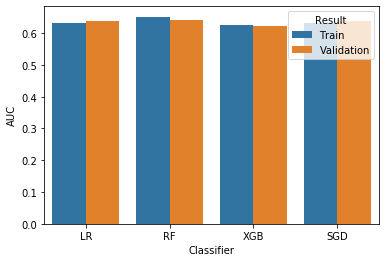

In [198]:
sb.barplot(data=All_AUC,x='Classifier',y='AUC',hue='Result')

In [199]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring=make_scorer(roc_auc_score)

In [200]:
# Stochastic Gradient Descent
penalty=['none','l2','l1']
max_iter=range(100,500,100)
alpha=[0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc={'penalty':penalty,'max_iter':max_iter,'alpha':alpha}
sgdc_random=RandomizedSearchCV(estimator=sgdc,param_distributions=random_grid_sgdc,n_iter=20,cv=2,scoring=auc_scoring,verbose=0,random_state=45)
sgdc_random.fit(X_train_scale,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.1, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=None, penalty='l2',
                                           power_t=0.5, random_state=42,
                                           shuffle=True, tol=0.001,
                                           validation_fraction=0.1, verbose=0,
                                           warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distribution

In [201]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 300, 'alpha': 0.003}

In [202]:
y_train_pred=sgdc.predict_proba(X_train_scale)[:,1]
y_valid_pred=sgdc.predict_proba(X_valid_scale)[:,1]

print('Baseline Stochastic Gradient Descent')
sgdc_train_auc_base=roc_auc_score(y_train,y_train_pred)
sgdc_valid_auc_base=roc_auc_score(y_valid,y_valid_pred)

print('Training AUC = %.2f '%sgdc_train_auc_base)
print('Validation AUC = %.2f '%sgdc_valid_auc_base)

print('Optimized Stochastic Gradient Descent')
y_train_pred_random=sgdc_random.best_estimator_.predict_proba(X_train_scale)[:,1]
y_valid_pred_random=sgdc_random.best_estimator_.predict_proba(X_valid_scale)[:,1]

sgdc_train_auc=roc_auc_score(y_train, y_train_pred_random)
sgdc_valid_auc=roc_auc_score(y_valid, y_valid_pred_random)

print('Training AUC = %.2f '%sgdc_train_auc)
print('Validation AUC = %.2f '%sgdc_valid_auc)

Baseline Stochastic Gradient Descent
Training AUC = 0.63 
Validation AUC = 0.64 
Optimized Stochastic Gradient Descent
Training AUC = 0.63 
Validation AUC = 0.64 


In [203]:
# Random Forest
n_estimators=range(200,1000,200)
max_features=['auto','sqrt']
max_depth=range(1,10,1)
min_samples_split=range(2,10,2)
criterion=['gini','entropy']

random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'criterion':criterion}
print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [204]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=20, cv=2, scoring=auc_scoring, verbose=1, random_state=45)
rf_random.fit(X_train_scale, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   52.4s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
    

In [205]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy'}

In [209]:
y_train_pred=rf.predict_proba(X_train_scale)[:,1]
y_valid_pred=rf.predict_proba(X_valid_scale)[:,1]

print('Baseline Random Forest')
rf_train_auc_base=roc_auc_score(y_train,y_train_pred)
rf_valid_auc_base=roc_auc_score(y_valid,y_valid_pred)

print('Training AUC = %.2f '%rf_train_auc_base)
print('Validation AUC = %.2f '%rf_valid_auc_base)

print('Optimized Random Forest')
y_train_pred_random=rf_random.best_estimator_.predict_proba(X_train_scale)[:,1]
y_valid_pred_random=rf_random.best_estimator_.predict_proba(X_valid_scale)[:,1]

rf_train_auc=roc_auc_score(y_train, y_train_pred_random)
rf_valid_auc=roc_auc_score(y_valid, y_valid_pred_random)

print('Training AUC = %.2f '%rf_train_auc)
print('Validation AUC = %.2f '%rf_valid_auc)

Baseline Random Forest
Training AUC = 0.65 
Validation AUC = 0.64 
Optimized Random Forest
Training AUC = 0.74 
Validation AUC = 0.65 


In [210]:
# Comparison of Random Forest and Stocastic Gradient Descent After Model Tuning
auc_sgdc_valid_base=pd.DataFrame({'AUC':[sgdc_valid_auc_base],'Classifier':'SGD','Result':'Baseline'})
auc_sgdc_valid_opt=pd.DataFrame({'AUC':[sgdc_valid_auc],'Classifier':'SGD','Result':'Optimized'})

auc_rf_valid_base=pd.DataFrame({'AUC':[rf_valid_auc_base],'Classifier':'RF','Result':'Baseline'})
auc_rf_valid_opt=pd.DataFrame({'AUC':[rf_valid_auc],'Classifier':'RF','Result':'Optimized'})

AUC_Base_Opt=pd.concat([auc_sgdc_valid_base,auc_sgdc_valid_opt,auc_rf_valid_base,auc_rf_valid_opt])
print(AUC_Base_Opt)

    AUC Classifier     Result
0  0.64        SGD   Baseline
0  0.64        SGD  Optimized
0  0.64         RF   Baseline
0  0.65         RF  Optimized


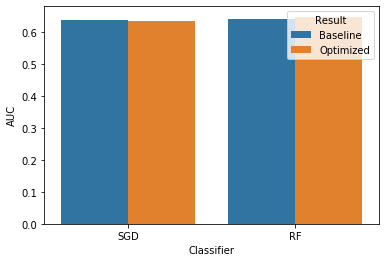

In [211]:
sb.barplot(data=AUC_Base_Opt,x='Classifier',y='AUC',hue='Result')

In [212]:
# Save the Best Model - Tuned Random Forest Classifier
pickle.dump(rf_random.best_estimator_,open('best_model.pkl','wb'),protocol=4)

In [213]:
X_test=data_test[Analysis_Cols].values
y_test=data_test['Target'].values

scaler=pickle.load(open('scaler.sav','rb'))
X_test_scale=scaler.transform(X_test)

In [214]:
best_model=pickle.load(open('best_model.pkl','rb'))

In [215]:
y_train_pred=best_model.predict_proba(X_train_scale)[:,1]
y_valid_pred=best_model.predict_proba(X_valid_scale)[:,1]
y_test_pred=best_model.predict_proba(X_test_scale)[:,1]

In [216]:
print('Final Evaluation')
print('Training')
final_train_accurracy, final_train_precision, final_train_recall, final_train_f1, final_train_auc=report(y_train, y_train_pred, threshold)
print('Validation')
final_valid_accurracy,final_valid_precision, final_valid_recall, final_valid_f1, final_valid_auc=report(y_valid, y_valid_pred, threshold)
print('Testing')
final_test_accurracy,final_test_precision, final_test_recall, final_test_f1, final_test_auc=report(y_test, y_test_pred, threshold)

Final Evaluation
Training
Accuracy = 0.66 
Precision = 0.64 
Recall = 0.71 
F1 Score = 0.67 
AUC = 0.74 
 
Validation
Accuracy = 0.57 
Precision = 0.16 
Recall = 0.66 
F1 Score = 0.26 
AUC = 0.65 
 
Testing
Accuracy = 0.57 
Precision = 0.16 
Recall = 0.66 
F1 Score = 0.26 
AUC = 0.64 
 


In [218]:
data={'Train':[final_train_accurracy, final_train_precision, final_train_recall, final_train_f1, final_train_auc],'Validation':[final_valid_accurracy,final_valid_precision, final_valid_recall, final_valid_f1, final_valid_auc],'Testing':[final_test_accurracy,final_test_precision, final_test_recall, final_test_f1, final_test_auc]}
final_eval=pd.DataFrame(data,index=['Accuracy','Precision','Recall','F1 Score', 'AUC'])
print(final_eval)

           Train  Validation  Testing
Accuracy    0.66        0.57     0.57
Precision   0.64        0.16     0.16
Recall      0.71        0.66     0.66
F1 Score    0.67        0.26     0.26
AUC         0.74        0.65     0.64


In [220]:
importances=rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [221]:
# Print the feature ranking
print("Feature ranking:")
feat_imp=[]
for f in range(X_train.shape[1]):
    feat_imp.append(data_Analysis.columns[indices[f]])
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.302059)
2. feature 11 (0.173578)
3. feature 4 (0.082197)
4. feature 0 (0.072116)
5. feature 3 (0.061722)
6. feature 5 (0.048790)
7. feature 36 (0.040924)
8. feature 1 (0.037890)
9. feature 28 (0.031597)
10. feature 2 (0.022608)
11. feature 27 (0.015645)
12. feature 21 (0.014933)
13. feature 8 (0.009932)
14. feature 17 (0.009170)
15. feature 25 (0.008472)
16. feature 18 (0.007612)
17. feature 12 (0.007545)
18. feature 26 (0.006527)
19. feature 15 (0.006100)
20. feature 23 (0.005424)
21. feature 16 (0.003915)
22. feature 20 (0.003903)
23. feature 19 (0.003734)
24. feature 7 (0.003543)
25. feature 32 (0.002978)
26. feature 9 (0.002954)
27. feature 24 (0.002865)
28. feature 22 (0.002266)
29. feature 33 (0.002069)
30. feature 35 (0.002027)
31. feature 34 (0.001867)
32. feature 10 (0.001810)
33. feature 29 (0.000930)
34. feature 30 (0.000299)
35. feature 31 (0.000000)
36. feature 13 (0.000000)
37. feature 14 (0.000000)


In [226]:
# Top Features affecting the Target
for i in range(len(feat_imp)):
    print("{}\t{:.2f}".format(feat_imp[i], importances[indices[i]]))

last_yr_visit	0.30
discharge_disposition_id_2	0.17
number_diagnoses	0.08
time_in_hospital	0.07
num_medications	0.06
New_Age	0.05
tr_insulin_1	0.04
num_lab_procedures	0.04
med_status_1	0.03
num_procedures	0.02
diabetesMed_1	0.02
diag_1_5.0	0.01
admission_type_id_3	0.01
diag_1_1.0	0.01
A1Cresult_2	0.01
diag_1_2.0	0.01
discharge_disposition_id_9	0.01
change_1	0.01
admission_source_id_4	0.01
max_glu_serum_2	0.01
admission_source_id_9	0.00
diag_1_4.0	0.00
diag_1_3.0	0.00
gender_1	0.00
tr_metformin_1	0.00
admission_type_id_5	0.00
A1Cresult_1	0.00
max_glu_serum_1	0.00
tr_glimepiride_1	0.00
tr_glyburide_1	0.00
tr_glipizide_1	0.00
discharge_disposition_id_18	0.00
med_status_2	0.00
med_status_3	0.00
med_status_4	0.00
admission_source_id_11	0.00
admission_source_id_14	0.00
